In [1]:
#import tensorflow
import tensorflow 

In [2]:
#import tensorflow inbuilt data set 
from tensorflow.keras.datasets import fashion_mnist

In [3]:
#create object and load the dataset 
data = fashion_mnist.load_data()

In [4]:
#split data to train and test (orignally it has done we are only asign here)
(train), (test) = data

In [5]:
x_train, y_train = train
x_test, y_test = test

In [6]:
print("x_train: {}".format(x_train.shape))
print("y_train: {}".format(y_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_test: {}".format(y_test.shape))

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [7]:
#get name function to get the name of the cloths 
class_names=['0 T-shirt/top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat',
    '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
def get_name(n):
    name = class_names[n]
    return name

9 Ankle boot


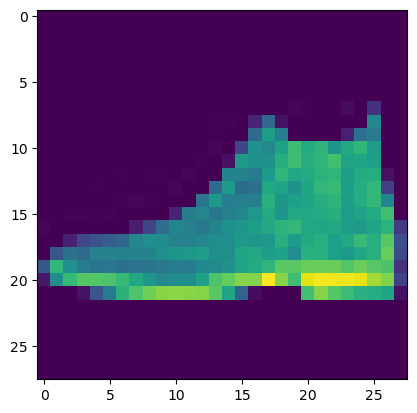

In [8]:
import matplotlib.pyplot as plt 
plt.imshow(x_test[0])
print(get_name(y_test[0]))

In [9]:
x_test[20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  24, 173, 222, 224, 206,
        180, 235, 175, 185, 233, 233, 149,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  22, 139, 242, 215, 252, 229, 211,
        112,   0,  52, 139, 228, 248, 202, 211, 158,  17,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   0, 143, 230, 229, 208, 197, 242, 224, 214,
        234, 186, 255, 234, 223, 235, 199, 211, 237, 219,  48,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 133, 216, 219, 205, 205, 185, 216, 202, 186,
        180, 199, 192, 225, 238, 182, 197, 222, 220, 208, 194,  29,   0,
          1,   0],
       [  0,   3,   0,  26, 214, 186, 208, 206, 209, 202, 194, 206, 195,
        173, 185, 181, 224, 177, 199, 195, 199, 215, 182, 208, 186,   0,
          0,   0],
       [  0,   7,   0, 126, 211, 185, 214, 215, 211, 213, 209, 197, 196,
        224, 200, 211, 194, 210, 222, 227, 232, 218, 185, 191, 199,   7,
          0,   0],
       [  

In [10]:
#normalized data 
x_train = x_train/255
x_test = x_test/255

In [11]:
#check the new min and max of the normalized data set
import numpy as np 
np.min(x_test[20])

0.0

In [12]:
#reshape to vectors 
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [13]:
x_train.shape

(60000, 784)

In [14]:
x_test.shape

(10000, 784)

In [15]:
#load the model
from tensorflow.keras.models import Sequential
model = Sequential()

In [16]:
x_train[1].shape

(784,)

In [17]:
#import layers (Dense)  and Droupout Regularization" 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model.add(Dense(units=256, activation='relu', input_shape=(784, )))
model.add(Dropout(0.4))
# model.add(Dense(units=512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units=256, activation='relu' ))
# model.add(Dropout(0.4))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=68, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [19]:
#compile model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [54]:
#early stoping
from tensorflow.keras.callbacks import EarlyStopping
early_stoping_callbacks = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

#model fit
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=50, verbose=1, callbacks=[early_stoping_callbacks])

Epoch 1/50
1200/1200 [==============================] - 13s 11ms/step - loss: 0.4222 - sparse_categorical_accuracy: 0.8529 - val_loss: 0.4015 - val_sparse_categorical_accuracy: 0.8564
Epoch 2/50
1200/1200 [==============================] - 13s 11ms/step - loss: 0.4149 - sparse_categorical_accuracy: 0.8545 - val_loss: 0.3817 - val_sparse_categorical_accuracy: 0.8633
Epoch 3/50
1200/1200 [==============================] - 13s 11ms/step - loss: 0.4131 - sparse_categorical_accuracy: 0.8548 - val_loss: 0.3835 - val_sparse_categorical_accuracy: 0.8660
Epoch 4/50
1200/1200 [==============================] - 14s 12ms/step - loss: 0.4034 - sparse_categorical_accuracy: 0.8589 - val_loss: 0.3844 - val_sparse_categorical_accuracy: 0.8647
Epoch 5/50
1200/1200 [==============================] - 13s 11ms/step - loss: 0.3967 - sparse_categorical_accuracy: 0.8597 - val_loss: 0.3773 - val_sparse_categorical_accuracy: 0.8693
Epoch 6/50
1200/1200 [==============================] - 12s 10ms/step - loss: 0.

In [59]:
#extract accuray and the loss from the history object 
train_accuracy = history.history['sparse_categorical_accuracy']
test_accuracy = history.history['val_sparse_categorical_accuracy']

train_loss = history.history['loss']
test_loss = history.history['val_loss']

#create the range base on number od executed epochs 
epochs = range(1, len(train_accuracy)+1)



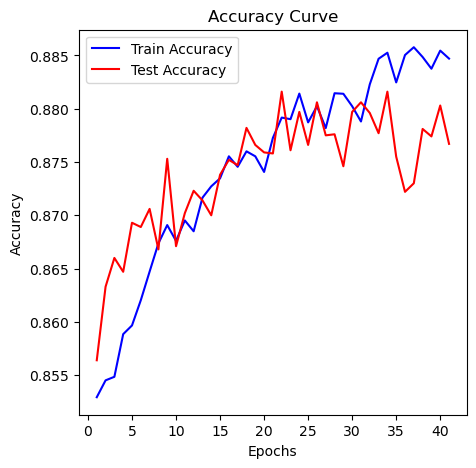

In [60]:

#plot the accuray curve
plt.figure(figsize=(5,5))
plt.plot(epochs, train_accuracy, 'b', label='Train Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Test Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


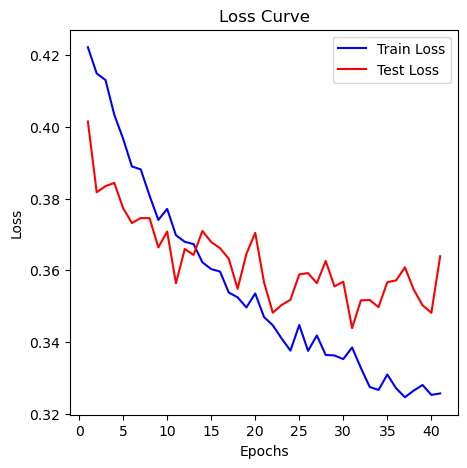

In [61]:

#plot the loss curve 
plt.figure(figsize=(5,5))
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, test_loss, 'r', label='Test Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [58]:
loss, accuracy = model.evaluate(x_test, y_test)
print("loss: {}".format(loss))
print("accuracy: {}".format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3639 - sparse_categorical_accuracy: 0.8767
loss: 0.36391201615333557
accuracy: 0.8766999840736389


In [63]:
#model predictions 

predicttion = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


array([[1.4972508e-16, 3.9545262e-15, 1.1392292e-19, ..., 1.5122988e-03,
        1.8367630e-09, 9.9837816e-01],
       [9.1551291e-04, 1.5495989e-07, 9.8165566e-01, ..., 1.3051753e-13,
        1.7864578e-07, 2.7724622e-14],
       [1.1022010e-15, 1.0000000e+00, 9.4808017e-20, ..., 0.0000000e+00,
        1.9515885e-38, 0.0000000e+00],
       ...,
       [1.4630920e-04, 2.5320376e-10, 6.3808400e-08, ..., 8.7588496e-08,
        9.9983394e-01, 9.0214503e-09],
       [1.8303472e-11, 1.0000000e+00, 2.3744121e-15, ..., 0.0000000e+00,
        4.1519329e-27, 0.0000000e+00],
       [9.0015681e-23, 9.9296754e-31, 2.8344261e-30, ..., 1.1996021e-07,
        6.9614487e-15, 3.2205918e-11]], dtype=float32)

In [71]:
predicttion_values = np.argmax(predicttion, axis=1)
predicttion_values

array([9, 2, 1, ..., 8, 1, 5])

In [80]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

print("accuracy: {}".format(accuracy_score(predicttion_values, y_test)))

print("precision: {}".format(precision_score(y_test, predicttion_values, average=None)))
print("recall: {}".format(recall_score(predicttion_values, y_test, average=None)))


accuracy: 0.8767
precision: [0.87144482 0.995842   0.74358974 0.83963134 0.81682028 0.97479839
 0.66666667 0.93582375 0.98382204 0.9742268 ]
recall: [0.87144482 0.995842   0.74358974 0.83963134 0.81682028 0.97479839
 0.66666667 0.93582375 0.98382204 0.9742268 ]


In [ ]:
cm = confusion_matrix(predicttion_values, )